# Практическое задание повышенной сложности
выполнил студнет 135М группы, физического факультета МГУ<br/>
**Голев Александр**

# 1. Описание набора данных. Постановка задачи. Описание выбранного классификатора

## Описание: 
Это реальный набор данных о состоянии знаний студентов по предмету "Электрические машины постоянного тока". Набор данных был получен из докторской диссертации. <br/>
**Область**: Computer Science<br/>
**Задачи**: Классификация, Кластеризация<br/>
**Количество экземпляров** : 403<br/>
**Количество характеристик** : 5<br/>
**Целевое значение** : 'UNS'<br/>
**Отсутствуют значения** : нет<br/>
**Последнее обновление** : Вт, 09 апреля 2024<br/>
**Doi набора данных** : 10.24432/C5231X<br/>
**Создатели** : ['Хамди Кахраман', 'Ильхами Чолак', 'Сереф Сагироглу']

**Дополнительная информация:**
* **STG** Время, затрачиваемое на изучение материалов по целевому объекту
* **SCG** Количество повторений пользователем материалов по целевому объекту 
* **STR** Время, затраченное пользователем на изучение объектов, связанных с объектом цели
* **LPR** Успеваемость пользователя на экзамене по объектам, связанным с объектом цели
* **PEG** Успеваемость пользователя на экзамене по объектам цели
<br/><br/>
* **UNS** Уровень знаний пользователя

## Задача:
Можно сформулировать нашу задачу как задачу обучения с учителем, где требуется предсказать уровень знаний пользователя (UNS) на основе пяти входных признаков: STG, SCG, STR, LPR, PEG. 

Так как UNS является категориальной переменной (very low, low, middle, high), то наша задача -  **задача многоклассовой классификации**.

## Описание классификатора:
Исходя из данных, можно сделать вывод, что признаки имеют некоторые нелинейные зависимости и разное распределение.</br> 
Среди знакомых методов, **K-Nearest Neighbors (KNN)** может быть хорошими кандидатом. </br>
Он может выявлять сложные нелинейные зависимости между признаками и классами.</br>



### K-Nearest Neighbors (KNN)

Метод K-Nearest Neighbors (KNN) — это один из алгоритмов машинного обучения, который может использоваться как для задач классификации, так и для задач регрессии. 

Алгоритм KNN основывается на идее, что объекты с похожими характеристиками находятся близко друг к другу в пространстве признаков. Для классификации или прогнозирования значения целевой переменной он рассматривает k ближайших соседей данного объекта и принимает решение на основе их значений.

**Преимущества**
* Алгоритм прост в понимании и реализации. Не требует сложных математических вычислений.
* KNN не предполагает никаких предположений о распределении данных (непараметрический метод).
* Алгоритм можно применять как для задач классификации, так и для задач регрессии.

**Недостатки**
* Алгоритм требует хранения всех данных и вычисления расстояний до всех точек в обучающем наборе, что может быть медленным для больших объемов данных.
* Поскольку KNN использует расстояния между точками, он чувствителен к масштабу признаков. Необходимо нормализовать или стандартизировать данные перед применением.
* KNN может быть чувствителен к выбросам и шуму в данных, особенно если k мало.

### Шаги работы

Пусть дана обучающая выборка $X = \{ (x_i, y_i)\}_{i = 1}^{\ell}$
и функция расстояния $\rho: X \times X \to [0, \infty)$,
и требуется классифицировать новый объект $u \in X$.
Расположим объекты обучающей выборки $X$ в порядке возрастания
расстояний до $u$:
$$
    \rho(u, x_u^{(1)})
    \leq
    \rho(u, x_u^{(2)})
    \leq
    \dots
    \leq
    \rho(u, x_u^{(\ell)}),
$$
где через $x_u^{(i)}$ обозначается $i$-й сосед объекта $u$.
Алгоритм __k ближайших соседей__ относит объект $u$ к тому классу,
представителей которого окажется больше всего среди $k$ его ближайших соседей:
$$
    a(u; X, k) = argmax_{y \in Y} \sum_{i = 1}^{k} w_i [y_u^{(i)} = y].
$$

Параметр $k$ обычно настраивается с помощью кросс-валидации.

В классическом методе $k$ ближайших соседей все объекты имеют единичные веса: $w_i = 1$.
Такой подход, однако, не является самым разумным.
Допустим, что $k = 3$, $\rho(u, x_u^{(1)}) = 1$, $\rho(u, x_u^{(2)}) = 1.5$,
$\rho(u, x_u^{(3)}) = 100$.
Ясно, что третий сосед находится слишком далеко и не должен оказывать сильное влияние на ответ.
Эта идея реализуется с помощью весов, обратно пропорциональных расстоянию:
$$
    w_i
    =
    K \left(
        \rho(u, x_u^{(i)})
    \right),
$$
где $K(x)$ --- любая монотонно убывающая функция.

С помощью метода $k$ ближайших соседей можно решать и задачи регрессии.
Для этого нужно усреднить значения целевой функции на соседях с весами:
$$
    a(u; X, k)
    =
    \frac{
        \sum_{i = 1}^{k}
            w_i y_u^{(i)}
    }{
        \sum_{i = 1}^{k}
            w_i
    },
$$

где $y_u^{(i)}$ "--- значение целевой переменной на объекте $x_u^{(i)}.$


# 2. Подключение библиотек и Чтение данных

In [48]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\golev\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [458]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
import itertools # Комбинаторика
# Визуализация данных
import seaborn as sns 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# разделение выборки
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

#Метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#метрики
from sklearn import metrics
from sklearn.utils import resample

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
user_knowledge_modeling = fetch_ucirepo(id=257) 
  
# data (as pandas dataframes) 
X = user_knowledge_modeling.data.features 
y = user_knowledge_modeling.data.targets
y.replace('very_low', 'Very Low', inplace=True) 


# 3. Характеристики набора данных и визуализация

In [13]:
user_knowledge_modeling.data.features.head(5)

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [3]:
# типы полей
print(user_knowledge_modeling.variables, end = '\n\n') 
print(X.dtypes)
print(y.dtypes)

  name     role         type demographic description units missing_values
0  STG  Feature   Continuous        None        None  None             no
1  SCG  Feature   Continuous        None        None  None             no
2  STR  Feature   Continuous        None        None  None             no
3  LPR  Feature   Continuous        None        None  None             no
4  PEG  Feature   Continuous        None        None  None             no
5  UNS   Target  Categorical        None        None  None             no

STG    float64
SCG    float64
STR    float64
LPR    float64
PEG    float64
dtype: object
UNS    object
dtype: object


In [14]:
# Описательная статистика, применяется для числовых полей
X.describe()


,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [95]:
# Описательную статистику по каждому классу отдельно
# И количество объектов каждого класса
all_data = pd.concat([X, y], axis=1)
grouped = all_data.groupby('UNS') 

for class_label, group in grouped:
    print("Class:", class_label)
    print(group.describe())

Class: High
              STG         SCG         STR         LPR         PEG
count  102.000000  102.000000  102.000000  102.000000  102.000000
mean     0.406902    0.430500    0.509755    0.542941    0.799804
std      0.246484    0.244666    0.251658    0.275568    0.109734
min      0.000000    0.000000    0.020000    0.010000    0.470000
25%      0.212500    0.250000    0.280000    0.300000    0.770000
50%      0.320000    0.330000    0.510000    0.515000    0.810000
75%      0.493750    0.610000    0.697500    0.807500    0.880000
max      0.990000    0.900000    0.950000    0.990000    0.990000
Class: Low
              STG         SCG         STR         LPR         PEG
count  129.000000  129.000000  129.000000  129.000000  129.000000
mean     0.326783    0.322798    0.424961    0.449302    0.253589
std      0.180934    0.191720    0.251465    0.228628    0.071131
min      0.020000    0.000000    0.020000    0.040000    0.010000
25%      0.180000    0.200000    0.180000    0.270000

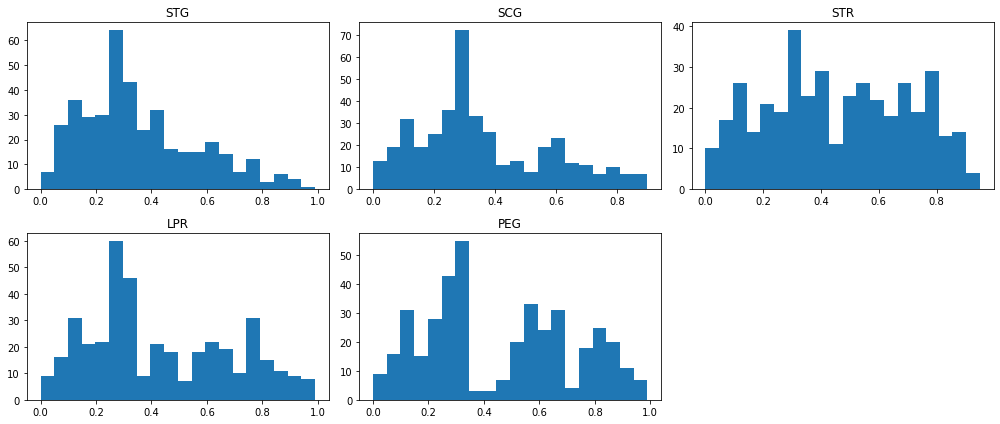

In [45]:
# Гистограммы по каждому параметру
n_bins = 20
fig, axs = plt.subplots(2, 3, figsize = (14,6))
axs = axs.flatten()
for i, column in enumerate(X.columns):
    axs[i].hist(all_data[column], bins = n_bins);
    axs[i].set_title(column);


# добавим отступы между диаграммами
fig.tight_layout(pad=1.0);

fig.delaxes(axs[5])
plt.tight_layout()

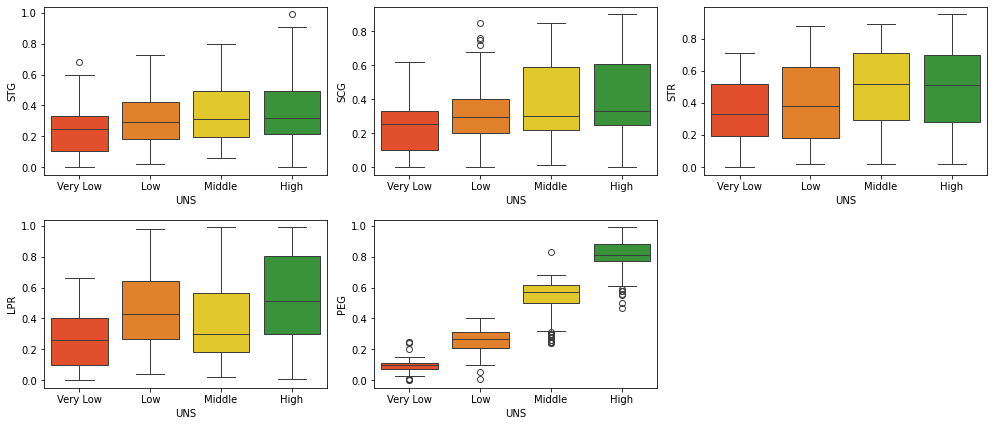

In [64]:
# диаграмма ящик с усами seaborn
fig, axs = plt.subplots(2, 3, figsize = (14,6))
axs = axs.flatten()
color_dict = {'Very Low': '#e14f2c', "Low": '#e1812c', "Middle": "#e1c82c", 'High': "#3a923a"}

cn = ['Very Low', 'Low', 'Middle', 'High']
for i, column in enumerate(X.columns):
    sns.boxplot(x = 'UNS', y = column, data = all_data, order = cn, ax = axs[i], palette = color_dict);

# add some spacing between subplots
fig.tight_layout(pad=1.0);

fig.delaxes(axs[5])

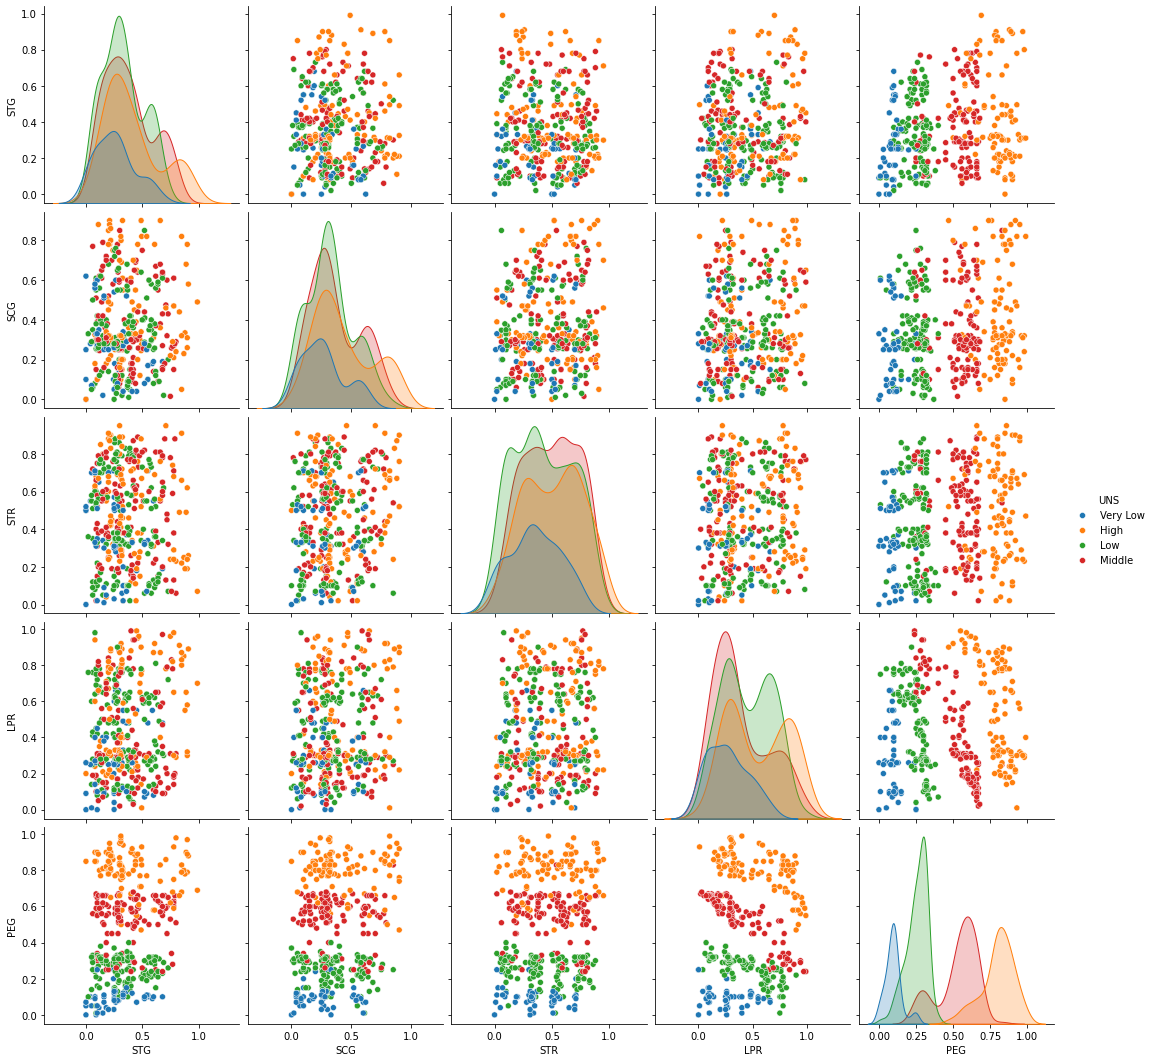

In [82]:
# матрица диаграммы рассеяния
sns.pairplot(all_data, hue='UNS', size=3)

Заметим сразу, что **признак PEG** очень сильно линейно коррелирует с целевым значением UNS.
Далее мы можем сосредоточить наше внимание на PEG. Поскольку PEG - это успеваемость ученика на экзамене по объектам цели. Мы видим, что чем выше результат успеваемость, тем больше он стремится быть отнесенным к классу степени знаний UNS - "High" и наоборот.

Проверим численно.

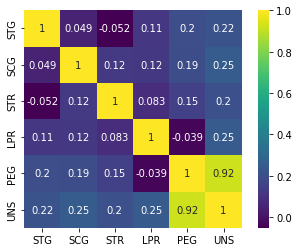

In [311]:
# Корреляционная матрица
number_dict = {'Very Low': 0, "Low": 1, "Middle": 2, 'High': 3}
number_dict_reverse = {0:'Very Low', 1: "Low" ,2: "Middle", 3: 'High'}

all_data_numeric = all_data.copy()
all_data_numeric['UNS'] = all_data_numeric['UNS'].map(number_dict)

corrmat = all_data_numeric.corr()
sns.heatmap(corrmat, annot = True, square = True, cmap = 'viridis');

# 4. Разделение выборки

In [451]:
# В работе буду использовать кросс-валидацию

# Разделим выборку на обучающую и тестовую
train, test = train_test_split(all_data_numeric, test_size = 0.4, stratify = all_data_numeric['UNS'], random_state = 42)

In [452]:
# Выделим признаки и результат
X_train = train[X.columns]
y_train = train.UNS
X_test = test[X.columns]
y_test = test.UNS

# 5. Создание модели машинного обучения

In [297]:
#Выбираем классификатор
knn = KNeighborsClassifier(n_neighbors=4)

#Проводим обучение
cv_scores = cross_val_score(knn, X, y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.83950617 0.82716049 0.92592593 0.85       0.8625    ]
cv_scores mean:0.8610185185185186


Используя перекрестную проверку, наша средная точность составляет **86,1% при обучении на всех признаках**.

**Попробуем использовать предположение о сильной взаимосвязи PEG и UNS.**</br>
В качестве второго признака выберу LPR (Успеваемость пользователя на экзамене по объектам, связанным с объектом цели).

In [316]:
X_LPR = X[['LPR' , 'PEG']].iloc[: , :].values

In [298]:
#Проводим обучение
cv_scores = cross_val_score(knn, X_LPR, y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.9382716  0.91358025 1.         0.95       0.95      ]
cv_scores mean:0.9503703703703703


Результат получился намного лучше! Целых **95%** в среднем.

In [222]:
knn_grid = GridSearchCV(knn,{}, cv=5, scoring='accuracy')
y_numeric = y['UNS'].map(number_dict)
knn_grid.fit(X_LPR,y_numeric)

best_model = knn_grid.best_estimator_

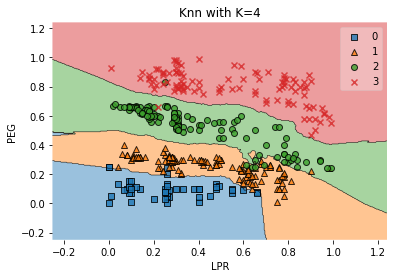

In [403]:
def knn_comparison(data, k, clf, names):
 x = data[names].values
 y = data['UNS'].values

 plot_decision_regions(x, y, clf=clf, zoom_factor=4)
 plt.xlabel(names[0])
 plt.ylabel(names[1])
 plt.title('Knn with K='+ str(k))


# Визуализация кластеров
knn_comparison(all_data_numeric, 4, best_model, ['LPR','PEG'])

Ранее при обучении мы использовали количество кластеров K=4 равным количеству категорий в целевом признаке UNS.</br>
Попробуем выполнить **гипернастройку параметров** и найти оптимальное количество кластеров.

In [447]:
#создаем новую модель knn 
knn2 = KNeighborsClassifier()
#создаем словарь всех значений, которые мы хотим проверить на наличие n_neighbors 
param_grid = {'n_neighbors': np.arange(1, 27)}
#используйте Gridsearch для проверки всех значений n_neighbors 
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#подгонять модель к данным 
knn_gscv.fit(X_LPR, y_numeric);

In [448]:
best_model = knn_gscv.best_estimator_

knn_gscv.best_params_

{'n_neighbors': 6}

Мы видим, что **6 — оптимальное значение для n_neighbors**. Мы можем использовать функцию best_score_ для проверки точности нашей модели, когда n_neighbors равно 6.

In [449]:
#проверим средний балл на предмет наиболее эффективного значения n_neighbours 
knn_gscv.cv_results_['mean_test_score'].max()


0.9603086419753086

**96% отлично!**

# 6. Оценка качества модели машинного обучения


In [455]:
#Выполняем предсказание на исходных тестовых данных
y_pred=best_model.predict(X_test[['LPR','PEG']])

print('accuracy (точность) классификатора',metrics.accuracy_score(y_pred,y_test))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора 0.9567901234567902
матрица ошибок
[[17  3  0  0]
 [ 0 51  1  0]
 [ 0  3 46  0]
 [ 0  0  0 41]]


Исходя из матрицы ошибок можно сделать вывод о том, что значение целевого признака 'Low' чаще остальных путается с 'Very Low' и 'Middle'. Это соответствует явному пересечению кластеров на графике LPR-PEG.

Произведем **анализ её устойчивости к изменениям в обучающей выборке**. Это важно для понимания, насколько стабильны и надежны предсказания модели при изменении набора данных, на которых она обучалась. 

Шаги для анализа:

**Бутстрэппинг:** Повторное случайное выборочное обучение модели с возвращением (bootstrap sampling) и оценка её производительности на каждой выборке.

**Анализ распределения точности:** Построение распределения значений точности, чтобы оценить её вариативность и среднее значение.

In [ ]:
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['LPR','PEG']])

# Параметры для бутстрэппинга
n_iterations = 100
n_size = int(len(X) * 0.7)
k_neighbors = 6
bootstrapped_scores = []

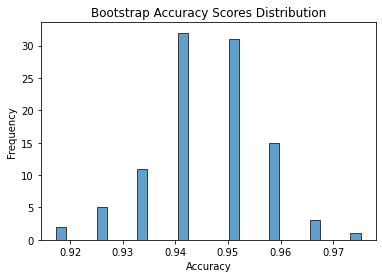

In [ ]:

for i in range(n_iterations):
    # Создание бутстрэппинговой выборки
    X_resampled, y_resampled = resample(X_scaled, y_numeric, n_samples=n_size, random_state=i)
    
    # Обучение KNN на бутстрэппинговой выборке
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(X_resampled, y_resampled)
    
    # Оценка на тестовой выборке
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.3, random_state=42, stratify=y_numeric)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    bootstrapped_scores.append(score)

# Анализ распределения точности
plt.hist(bootstrapped_scores, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrap Accuracy Scores Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Вывод статистики
mean_score = np.mean(bootstrapped_scores)
std_score = np.std(bootstrapped_scores)
print(f'Mean Accuracy: {mean_score:.2f}')
print(f'Standard Deviation of Accuracy: {std_score:.2f}')

Mean Accuracy: 0.95
Standard Deviation of Accuracy: 0.01


* Модель демонстрирует высокую точность предсказаний. Это подтверждает, что KNN с использованием признаков PEG и LPR является хорошим инструментом для классификации уровня знаний студентов.

* Низкое стандартное отклонение указывает на то, что модель стабильна и дает очень похожие результаты при изменении обучающих выборок. Это означает, что модель KNN устойчива к изменению данных и будет демонстрировать аналогичную производительность на новых наборах данных.

* Распределение точности модели сосредоточено вокруг значений 0.94. Это указывает на то, что модель, обученная на разных подвыборках, почти всегда показывает высокую точность, что подтверждает консистентность модели.

# 7. Применение построенной модели машинного обучения 
## Пример 1
* Первый вариант использования очевиден, мы можетм использовать модель для оценки уровня знаний новых студентов. На основании показателей STG, SCG, STR, LPR и PEG для новых студентов, модель может классифицировать их в категории UNS. Это позволит преподавателям сразу определить, кому требуется дополнительная помощь или поддержка.

In [313]:
student = pd.Series({'STG': 0.5, 'SCG': 0.5, 'STR': 0.5, 'LPR': 0.5, 'PEG': 0.5})
knowledge = best_model.predict([student[['LPR','PEG']]])

print(number_dict_reverse[knowledge[0]])

Middle


* На основе предсказанного уровня знаний можно создать индивидуальные учебные планы для студентов. Например, студенты с уровнем "very low" могут получать дополнительные занятия и материалы, тогда как студенты с уровнем "high" могут получать более сложные задачи и проекты.

* Модель может использоваться для оценки изменений в уровне знаний студентов до и после внедрения новой образовательной программы или метода преподавания.

Однако в данной моделе мы использовали только признаки **LPR и PEG**. </br>
Таким образом мы выяснили, что **успеваемость действительно взаимосвязана с уровнем знаний студентов**, </br>
однако было бы полезно знать, как остальные параметры связаны с уровнем знаний.

## Пример 2

Используем другой набор параметров, **STG и STR**. Исследуем, насколько продолжительность обучения связана с конечной степенью знаний. 

In [436]:
X_STG = X[['STG', 'STR']].iloc[: , :].values

#Проводим обучение
cv_scores = cross_val_score(knn, X_STG, y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.40740741 0.33333333 0.40740741 0.35       0.5375    ]
cv_scores mean:0.4071296296296296


In [437]:
knn = KNeighborsClassifier(metric=)

param_grid = {'n_neighbors': np.arange(1, 27)}
knn_stg = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_stg.fit(X_STG, y_numeric);

print(knn_stg.best_score_)
print(knn_stg.best_params_)

0.40969135802469137
{'n_neighbors': 5}


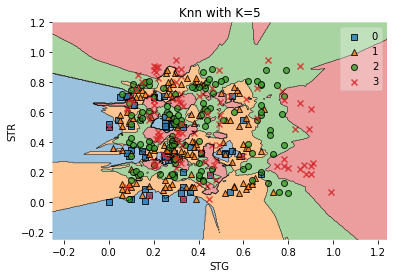

In [438]:
# Визуализация кластеров
knn_comparison(all_data_numeric, 5, knn_stg.best_estimator_, ['STG', 'STR'])

Как видно, с малой долей вероятности мы можем предсказывать степень знаний студента на основе информации о продолжительности обучения, однако есть большое количество студентов, добивающихся хорошей успеваимости при малом времени обучения.

## Пример 3

(KNN) может использоваться не только для задач классификации, но и для **задач регрессии**. В задачах регрессии модель KNN прогнозирует значение целевой переменной на основе средней или медианной величины целевых значений k ближайших соседей.

**Прогнозирование оценки выполнения лабораторных работ (LPR)</br>**
Университет хочет предсказать оценку выполнения учебных работ (LPR) студентов на основе других характеристик. Это может помочь в выявлении студентов, которые могут получить низкие оценки и предложить им поддержку заранее.

**Цель:**
Использовать модель KNN для прогнозирования оценки выполнения учебных работ (LPR) студентов на основе их характеристик.

In [457]:
# Разделение на признаки и целевую переменную
X_for_LPR = all_data[['STG', 'SCG', 'STR', 'PEG']]
y_LPR = all_data['LPR']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_LPR)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_LPR, test_size=0.3, random_state=42)

In [459]:
# Обучение модели KNN для регрессии
k_neighbors = 6
knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_regressor.fit(X_train, y_train)

# Оценка модели
y_pred = knn_regressor.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.07


In [460]:
# Прогнозирование оценки выполнения лабораторных работ для новых студентов
new_students_data = pd.DataFrame({
    'STG': [0.7, 0.5, 0.8, 0.3],
    'SCG': [0.6, 0.4, 0.7, 0.2],
    'STR': [0.8, 0.6, 0.9, 0.4],
    'PEG': [0.85, 0.6, 0.75, 0.4]
})

new_students_scaled = scaler.transform(new_students_data)
predicted_lpr = knn_regressor.predict(new_students_scaled)

In [462]:
# Вывод результатов
for i, lpr in enumerate(predicted_lpr):
    print(f"Студент {i+1}: Прогнозируемая оценка выполнения учебных работ (LPR) - {lpr:.2f}")

Студент 1: Прогнозируемая оценка выполнения учебных работ (LPR) - 0.38
Студент 2: Прогнозируемая оценка выполнения учебных работ (LPR) - 0.24
Студент 3: Прогнозируемая оценка выполнения учебных работ (LPR) - 0.60
Студент 4: Прогнозируемая оценка выполнения учебных работ (LPR) - 0.43


Использование модели KNN для регрессии позволяет предсказать оценку выполнения учебных работ студентов на основе их характеристик. 

Это может помочь в выявлении студентов, которые могут получить низкие оценки, и предложить им поддержку заранее.